In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D, Input
from keras.optimizers import Adam
from statistics import mean
import tensorflow as tf
from keras.models import model_from_json
import numpy as np
from matplotlib import pyplot as plt


In [3]:
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                    #rotation_range=30,
                                    #shear_range=0.3,
                                    #zoom_range=0.3,
                                    #horizontal_flip=True,
                                    #fill_mode='nearest'
                                   )
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                    #rotation_range=30,
                                    #shear_range=0.3,
                                    #zoom_range=0.3,
                                    #horizontal_flip=True,
                                    #fill_mode='nearest'
                                    )

train_generator = train_data_generator.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = test_data_generator.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
#Initialize our facial emotion recognition model
FER_CNN = Sequential()

#Add the input dimensions
FER_CNN.add(Input(shape=(48,48,1)))

#Add two convolutional layers with kernel size 5, and relu activation
FER_CNN.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
FER_CNN.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
#Add a max pooling layer to reduce noise, with kernel 2
FER_CNN.add(MaxPooling2D(pool_size=(2, 2)))
#Add a dropout layer with rate 0.25 to reduce risk of overfitting
FER_CNN.add(Dropout(0.25))
 
#Two convolutional layers with kernel size 5 and activation relu
#followed by two maxpooling layers with kernel 2 (to reduce noise)
FER_CNN.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
FER_CNN.add(MaxPooling2D(pool_size=(2, 2)))
FER_CNN.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
FER_CNN.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout layer to reduce risk of overfitting, rate of 0.25
FER_CNN.add(Dropout(0.25))
 
#Final linear layers with final dropout layer with rate 0.25
FER_CNN.add(Flatten())
#FER_CNN.add(Dense(1024, activation='relu'))
FER_CNN.add(Dropout(0.25))
#Softmax function to give probabilistic distribution to each class
FER_CNN.add(Dense(7, activation='softmax'))
 
#See our model architecture:
FER_CNN.summary()
 
 
learning_rate = 0.001

#Choose our optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
FER_CNN.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                      metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 44, 44, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 670,343 (2.56 MB)

 Trainable params: 670,343 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
emotion_model_info = FER_CNN.fit(
    train_generator,
    steps_per_epoch=28709 // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=7178 // 32
)

Epoch 1/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 9:33 640ms/step - accuracy: 0.1562 - loss: 1.9476

/Users/timothytaylor/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/897 ━━━━━━━━━━━━━━━━━━━━ 1:02 109ms/step - accuracy: 0.2330 - loss: 1.8752

KeyboardInterrupt: 

In [ ]:
FER_CNN.evaluate(validation_generator)
train_accuracy = emotion_model_info.history['accuracy']
validation_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']

max_val_accuracy = max(validation_accuracy)
print("Test Accuracy: ", max_val_accuracy)
print("Training Accuracy: ", max(train_accuracy))

overall_accuracies = []
for i in range(len(train_accuracy)):
    overall_accuracies.append((train_accuracy[i]*28709 + validation_accuracy[i]*7178) / (28709+7178))
print("Overall Accuracy: ", max(overall_accuracies))

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5979 - loss: 1.2028
Test Accuracy:  1.0
Training Accuracy:  0.75
Overall Accuracy:  0.7399991616583045


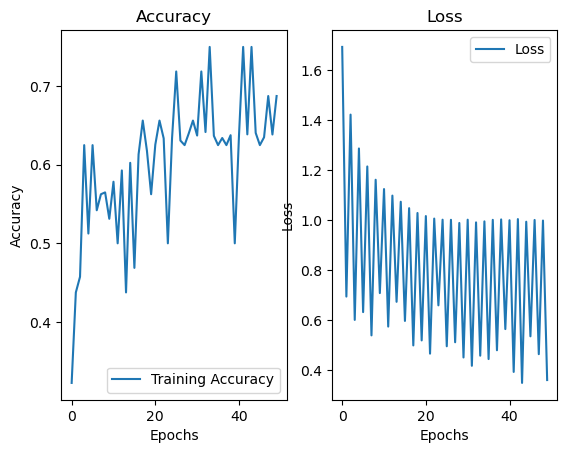

In [ ]:
# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()